# Определение возраста покупателей

### Описание проекта

Сетевой супермаркет «Хлеб-Соль» внедряет систему компьютерного зрения для обработки фотографий покупателей. Фотофиксация в прикассовой зоне поможет определять возраст клиентов, чтобы:
Анализировать покупки и предлагать товары, которые могут заинтересовать покупателей этой возрастной группы;
Контролировать добросовестность кассиров при продаже алкоголя.
Постройте модель, которая по фотографии определит приблизительный возраст человека. В вашем распоряжении набор фотографий людей с указанием возраста.

## Исследовательский анализ данных

#### Проведите исследовательский анализ данных:

1. Посмотрите на размер выборки.
2. Постройте график распределения возраста в выборке.
3. Напечатайте на экране 10–15 фотографий и посмотрите, как устроен датасет.
4. Сделайте выводы о том, как результаты исследования повлияют на обучение модели.

In [10]:
# Импорты:
import pandas as pd
import numpy as np, traceback
from PIL import Image
from matplotlib import pyplot as plt
import seaborn as sns
from tqdm.auto import tqdm

In [11]:
# Функция отрисовки диаграммы типа 'histplot' и диаграммы размаха. Аргументы: датасет, наименование столбца.
def plot_function_col(df, column):    
    plt.figure(figsize=[14, 5])
    plt.subplot(2, 1, 1) 
    sns.set(rc={"figure.figsize":(18, 5)})
    sns.histplot(data=df, x=column, bins=100).set(title='Гистограмма и диаграмма размаха по признаку ' + column)    
    plt.subplot(2, 1, 2)    
    sns.boxplot(x=df[column]).set()  
    plt.show() 

In [12]:
# Функция вывода изображения из файла
def img_func(filename):
    img = plt.imread('/datasets/faces/final_files/' + filename)
    plt.imshow(img)
    plt.show()

In [13]:
# Функция получения размеров изображения
def image_func(filename):
    im = Image.open('/datasets/faces/final_files/' + filename)
    (width, height) = im.size
    return width, height, width / height

In [14]:
# Загрузим датафрейм:
df = pd.read_csv('/datasets/faces/labels.csv')
df.head()

,file_name,real_age
0,000000.jpg,4
1,000001.jpg,18
2,000002.jpg,80
3,000003.jpg,50
4,000004.jpg,17


In [15]:
# Посмотрим на размер выборки
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7591 entries, 0 to 7590
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_name  7591 non-null   object
 1   real_age   7591 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 118.7+ KB


In [16]:
# Проверим на дубликаты
df.duplicated().sum()

0

In [17]:
# Проверим соответствие jpg в столбце 'file_name'
df['jpg'] = df['file_name'].apply(lambda x: x[-4:])
df['jpg'].value_counts()

.jpg    7591
Name: jpg, dtype: int64

Гистограмма 1


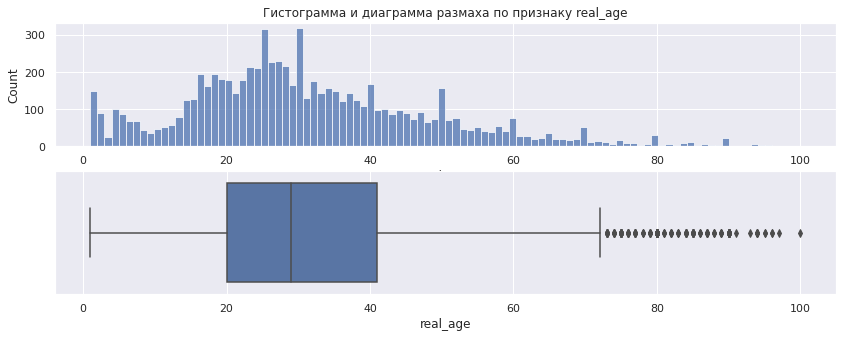

In [19]:
# Посмотрим распределение возраста в выборке
print('Гистограмма 1')
plot_function_col(df, 'real_age')

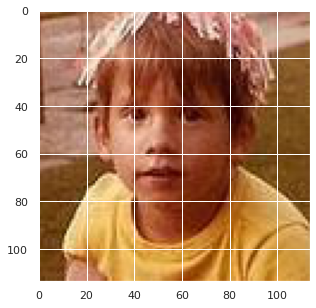

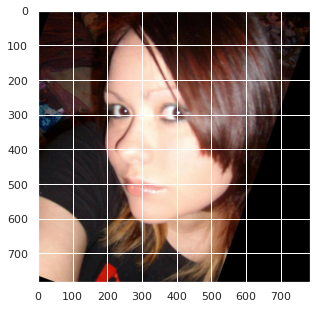

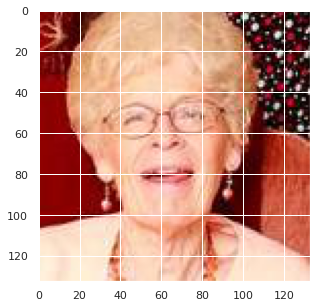

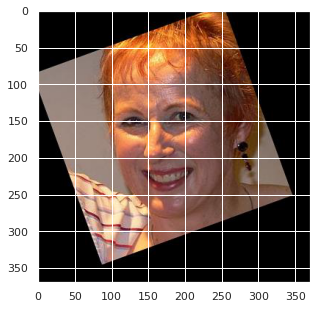

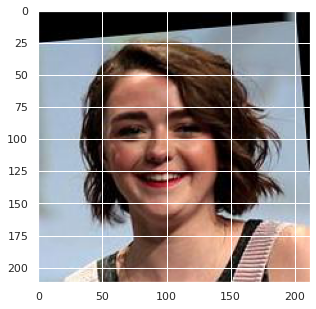

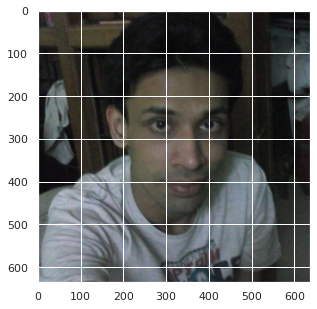

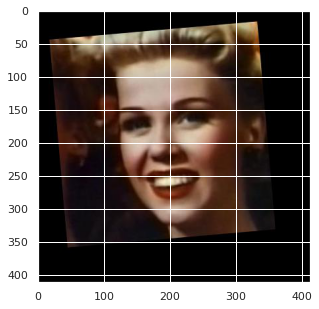

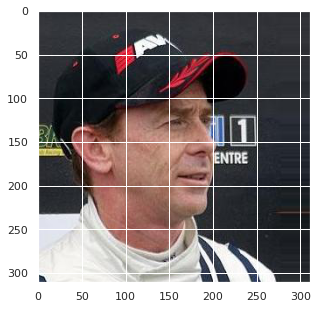

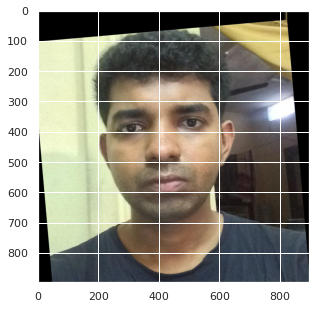

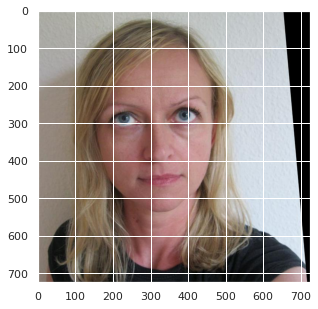

In [20]:
# Загрузим первые десять фотографий:
df_10 = df[0:10]
df_10['file_name'].apply(lambda x: img_func(x));

In [21]:
tqdm.pandas()

In [22]:
# Узнаем размеры и пропорции фотографий
df[['width','height','rate']] = df['file_name'].progress_apply(lambda x: '%d,%d,%.2f' % image_func(x)).str.split(',',expand=True)
df

  0%|          | 0/7591 [00:00<?, ?it/s]

,file_name,real_age,jpg,width,height,rate
0,000000.jpg,4,.jpg,114,114,1.00
1,000001.jpg,18,.jpg,784,784,1.00
2,000002.jpg,80,.jpg,133,133,1.00
3,000003.jpg,50,.jpg,370,370,1.00
4,000004.jpg,17,.jpg,212,212,1.00
...,...,...,...,...,...,...
7586,007608.jpg,14,.jpg,159,159,1.00
7587,007609.jpg,37,.jpg,260,260,1.00
7588,007610.jpg,28,.jpg,116,116,1.00
7589,007611.jpg,20,.jpg,278,278,1.00


In [23]:
# Приведем в соответствие числовые данные
df[['width', 'height']] = df[['width', 'height']].astype(int)
df['rate'] = df['rate'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7591 entries, 0 to 7590
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   file_name  7591 non-null   object 
 1   real_age   7591 non-null   int64  
 2   jpg        7591 non-null   object 
 3   width      7591 non-null   int64  
 4   height     7591 non-null   int64  
 5   rate       7591 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 356.0+ KB


In [24]:
# Оценим количество 'неквадратных' пропорций
df['rate'].value_counts()

1.00    6959
0.99     213
1.01     184
0.75      33
1.33      30
        ... 
1.23       1
0.91       1
1.20       1
1.30       1
1.53       1
Name: rate, Length: 66, dtype: int64

In [25]:
# Оценим процент 'неквадратных' пропорций
sh_0 = df.shape[0]
k = round(100 * (sh_0 - 6959 - 213 - 184) / sh_0,)
k

3

Гистограмма 2


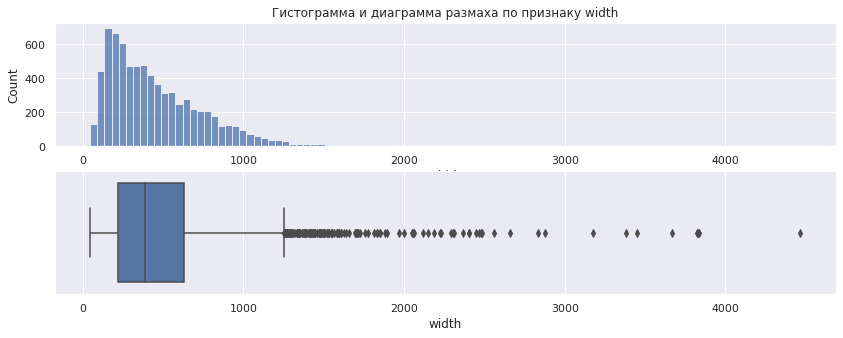

In [26]:
# Посмотрим распределение размеров фотографий
print('Гистограмма 2')
plot_function_col(df, 'width')

### Выводы по анализу данных:

1. В датасет загружены данные из источника labels.csv. Размеры датасета (7591, 2).
2. Датасет проверен на пропуски и дубликаты. Дубикатов и пропусков не обнаружено.
3. Столбец датасета 'file_name' содержит имена файлов изображений, содержащихся в источнике данных final_files.
4. Столбец датасета 'real_age' содержит метки возраста человека на соответствующей file_name-фотографии.
5. Столбец датасета 'file_name' проверен на соответствие окончанию .jpg
6. Гистограмма 1 демонстрирует негауссовское распределение меток возраста в датасете. 
7. Выведены первые десять фотографий из источника final_files. Фотографии представляют собой цветные изображения лица человека в разных ракурсах, имеющие разные размеры и разные углы отклонения от вертикали.
8. С помощью самодельных функций из источника final_files в отдельные столбцы выведены ширина фотографии, высота фотографии и ее пропорции (отношение ширины к высоте).
9. Оценено количество 'неквадратных' изображений. Без учета отклонений в пределах одного процента, 'неквадратных' изображений в базе около 3%
10. Гистограмма 2 показывает пуассоновское распределение размеров изображений. 
11. Датасет в количественном и качественном отношениях пригоден для тренировки и настройки модели машинного обученя.
12. Результаты исследовательского анализа данных позволяют осознанно выбрать параметры обучения нейросети.

## Обучение модели

####  Обучите модель в GPU-тренажёре

Постройте и обучите свёрточную нейронную сеть на датасете с фотографиями людей. Добейтесь значения MAE на тестовой выборке не больше 8. Датасет представляет собой набор фотографий людей в формате .jpg, находящийся в папке /datasets/faces/final_files и список фотографий с соответствующим возрастом в файле datasets/faces/labels.csv
Функцию загрузки тестовой выборки load_test(path) напишите самостоятельно. Вместе со старыми функциями в коде должны быть:
load_train(path),
load_test(path),
create_model(input_shape),
train_model(model, train_data, test_data, batch_size, epochs, steps_per_epoch, validation_steps).
В статье о датасете, с которым вы работаете, значение MAE равно 5.4 — если вы получите MAE меньше 7, это будет отличный результат!

Перенесите сюда код обучения модели и её результат вывода на экран.


(Код в этом разделе запускается в отдельном GPU-тренажёре, поэтому оформлен не как ячейка с кодом, а как код в текстовой ячейке)

```python

# Импорты:
import pandas as pd
import numpy as np, traceback
import tensorflow as tf
from matplotlib import pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.applications.resnet import preprocess_input
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Функция загрузки train
def load_train(path):
    print('path:', path)
    
    df = pd.read_csv(path + 'labels.csv')
    
    print(df.head())
    
    train_datagen_1 = ImageDataGenerator( 
        rescale=1.0 / 255,
        validation_split=0.25,
        horizontal_flip=True,
    )
    
    train_datagen_flow = train_datagen_1.flow_from_dataframe(
        dataframe=df,
        directory=path + "final_files",
        x_col="file_name",
        y_col="real_age",
        target_size=(150, 150),
        batch_size=32,        
        class_mode="raw",
        subset='training',
        shuffle=True,
        seed=12345
    )

    return train_datagen_flow

# Функция загрузки test
def load_test(path):
    print('path:', path)

    df = pd.read_csv(path + 'labels.csv')
    
    print(df.head())

    train_datagen_2 = ImageDataGenerator( 
        rescale=1.0 / 255,
        validation_split=0.25,
    )
    
    val_datagen_flow = train_datagen_2.flow_from_dataframe(
        dataframe=df,
        directory=path + "final_files",
        x_col="file_name",
        y_col="real_age",
        target_size=(150, 150),
        batch_size=32,
        class_mode="raw",
        subset='validation',
        shuffle=True,
        seed=12345
    )

    return val_datagen_flow

# Функция создания модели
def create_model(input_shape=None, num_classes=1):
    backbone = ResNet50(
        input_shape=input_shape,
        weights='/datasets/keras_models/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5',
        include_top=False)

    print('input_shape', input_shape)
        
    model = Sequential()
    model.add(backbone)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(128, activation='relu'))   
    model.add(Dense(1, activation='relu'))
    optimizer = Adam(learning_rate=0.0001)
    model.compile(        
        optimizer=optimizer, loss="mse", metrics=['mae']
    )
    
    return model

# Функция запуска модели
def train_model(
    model,
    train_datagen_flow,
    val_datagen_flow,
    batch_size=None,
    epochs=10,
    steps_per_epoch=None,
    validation_steps=None
):
    print(type(train_datagen_flow))
    print(type(val_datagen_flow))
    print('batch_size:', batch_size)
    print('epochs:', epochs)
    print('steps_per_epoch:', steps_per_epoch)
    print('validation_steps:', validation_steps)

    for dataset in [val_datagen_flow, train_datagen_flow]:
        print('\ndirectory:', dataset.directory)
        print('target_size:', dataset.target_size)
        print('batch_size:', dataset.batch_size)
        print('class_mode:', dataset.class_mode)
        print('subset:', dataset.subset)
        print('shuffle:', dataset.shuffle)
    
    model.fit(
        train_datagen_flow,
        validation_data=val_datagen_flow,
        batch_size=batch_size,
        epochs=epochs,
        steps_per_epoch=steps_per_epoch,
        validation_steps=validation_steps,
        verbose=2
    )
    return model

```

```

# < скопируйте результат вывода на экран сюда >

2024-10-18 19:47:20.240305: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1697] Adding visible gpu devices: 0
Using TensorFlow backend.

path: /datasets/faces/
    file_name  real_age
0  000000.jpg         4
1  000001.jpg        18
2  000002.jpg        80
3  000003.jpg        50
4  000004.jpg        17
Found 5694 validated image filenames.

path: /datasets/faces/
    file_name  real_age
0  000000.jpg         4
1  000001.jpg        18
2  000002.jpg        80
3  000003.jpg        50
4  000004.jpg        17
Found 1897 validated image filenames.

input_shape (224, 224, 3)
batch_size: None
epochs: 10
steps_per_epoch: None
validation_steps: None

directory: /datasets/faces/final_files
target_size: (150, 150)
batch_size: 32
class_mode: raw
subset: validation
shuffle: True

directory: /datasets/faces/final_files
target_size: (150, 150)
batch_size: 32
class_mode: raw
subset: traini

Train for 178 steps, validate for 60 steps
Epoch 1/10
178/178 - 67s - loss: 230.1404 - mae: 11.0212 - val_loss: 647.2702 - val_mae: 20.4726
Epoch 2/10
178/178 - 42s - loss: 75.6283 - mae: 6.5312 - val_loss: 530.4811 - val_mae: 17.9529
Epoch 3/10
178/178 - 42s - loss: 46.7607 - mae: 5.1865 - val_loss: 294.4966 - val_mae: 12.6542
Epoch 4/10
178/178 - 42s - loss: 31.1360 - mae: 4.2612 - val_loss: 172.7319 - val_mae: 9.7664
Epoch 5/10
178/178 - 42s - loss: 23.6919 - mae: 3.7011 - val_loss: 85.5212 - val_mae: 6.9393
Epoch 6/10
178/178 - 42s - loss: 17.9044 - mae: 3.2054 - val_loss: 77.1694 - val_mae: 6.5784
Epoch 7/10
178/178 - 43s - loss: 14.5530 - mae: 2.8567 - val_loss: 72.7075 - val_mae: 6.4865
Epoch 8/10
178/178 - 43s - loss: 11.9697 - mae: 2.5847 - val_loss: 72.8280 - val_mae: 6.5445
Epoch 9/10
178/178 - 43s - loss: 10.8661 - mae: 2.4360 - val_loss: 77.4391 - val_mae: 6.4821
Epoch 10/10
178/178 - 43s - loss: 9.5444 - mae: 2.2867 - val_loss: 67.6371 - val_mae: 6.0331

60/60 - 11s - loss: 67.6371 - mae: 6.0331
Test MAE: 6.0331

```

## Анализ обученной модели

1. Определение возраста человека по фотографии представляет собой задачу регрессии.
2. Для решения задачи выбрана предобученная модель ResNet50, содержащая 50 нейронных слоев. Последние два слоя ResNet50 выключены с целью донастройки модели.
3. На вход ResNet50 подается изображение размером (150, 150, 3). Аугментация не используется.
4. Выходные данные из ResNet50 поступают на усредняющий слой GlobalAveragePooling2D и для получения предсказания обрабатываются в двух полносвязных слоях Dense-128 и Dense-1.
5. Для оптимизации шагов градиентного спуска в модели применяется алгоритм Adam.
6. В качестве функции потерь используетмя метрика MSE. Для контроля качества модели используетмя метрика MAE.
7. Для обучения модели достаточно десяти эпох.
8. Начиная с пятой эпохи и далее модель выдает знчения MAE менее 8.